# ICPE 689 Data Science Fundamental for Energy II

Some of the examples and exercises of this course are based on two popular books on data science with Python, [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
and [the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

<span><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/HandsonML.jpg?raw=1" width="200" /><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/PDSH-cover.png?raw=1" width="200" /></span>

## Deep Learning Methods

Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. This module covers the following topiocs.

1. Perceptrons
2. Multi-layer perceptrons
3. Deep Neural Network with Keras

[<img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/colab-badge.png?raw=1" width="200"/>](https://colab.research.google.com/github/Snehashis111/AdvancedML/blob/main/Deep_Learning_methods.ipynb)

In [1]:
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# hide warning messages
import warnings
warnings.filterwarnings('ignore')

### Perceptrons
The Perceptron is a simple classification algorithm suitable for large scale learning. As the simplest form of a neural network, specifically a single-layer neural network, perceptrons play an important role in binary classification. Perceptrons are also referred to as linear binary classifiers for this reason.

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/Perceptron.png?raw=1" width="400"/><br/>Credit: DeepAI.org</center> <br>
Step function,$H(x)$ is defined below $$H(x) = \begin{cases}
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}
$$<br>
The algorithm tries to minimize Perceptron loss $$L(y, \hat{y}) = \max(0, -y \cdot \hat{y})
$$

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # load petal length and petal width only.
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

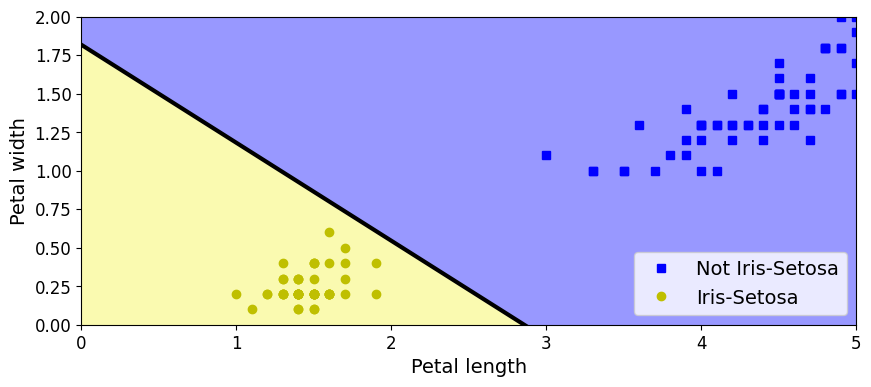

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3) #decision boundary
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes);

### Activation functions
Suppose I want to get probability instead of 0/1 value. Instead of step function we have option to use other functions. These are called activation functions. <br>
The activation function of a node defines the output of that node given an input or set of inputs. In other words, an activation function is like a gate that checks that an incoming value is greater than a critical number. Activation functions add non-linearities into neural networks, making the neural networks more expressive.

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/activation_function.png?raw=1" width="500"/><br/>Credit: towardsdatascience.com</center>

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

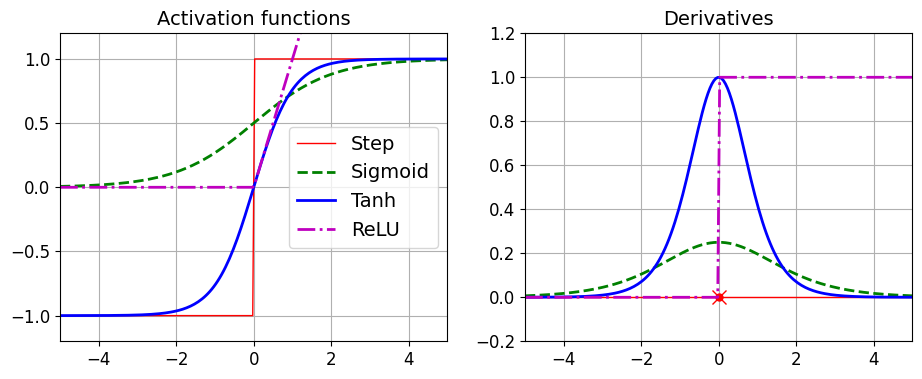

In [ ]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

The linear combination of input and weights and the activation function together builds a neuron. We can stack multiple of them where one neuron sends its output to another neuron resulting in a more complex function. We generally call them neural networks.<br>
For example lets say we want to build a neural network to predict house price from 4 input features Size,Number of bedrooms,Zip code,Wealth of neighbourhood ($x_1,x_2,x_3,x_4$ respectively). Let $a_1,a_2,a_3$ be the output values of 3 neurons in the first layer which has a ReLU activation function.
<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/HousePriceNN.PNG?raw=1" width="500"/><br/></center> <br>
Then giben the image we can write. $$a_1=ReLU(θ_1x_1+θ_2x_2+θ_3)$$
$$a_2=ReLU(θ_4x_3+θ_5)$$
$$a_3=ReLU(θ_6x_3+θ_7x_4+θ_8)$$ <br>
where $\theta$ are parameters. The final output ($\hat{y})$ will be
$$\hat{y}=θ_9a_1+θ_{10}a_2+θ_{11}a_3+θ_{12}$$ <br>
We wont use any activation in that layer as this output can take any value. We estimate these parameters by different optimizer functions available. Some of the optimizer functions available in Keras are SGD,Adam,RMSProp etc. <br>
Inside each layer we use same activation function but different layers can have different activation functions. Some activation function have different inherent problems like for Sigmoid activation for high/low values of $z$ the gradient will be small as the Sigmoid flattens so weights wont get updated by much.



### Building an Image Classifier
Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

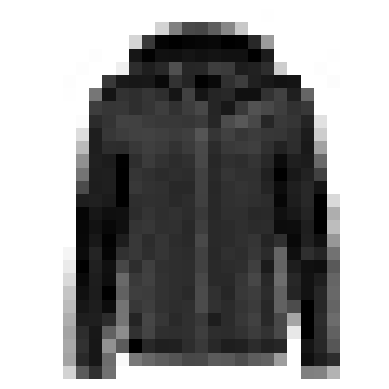

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

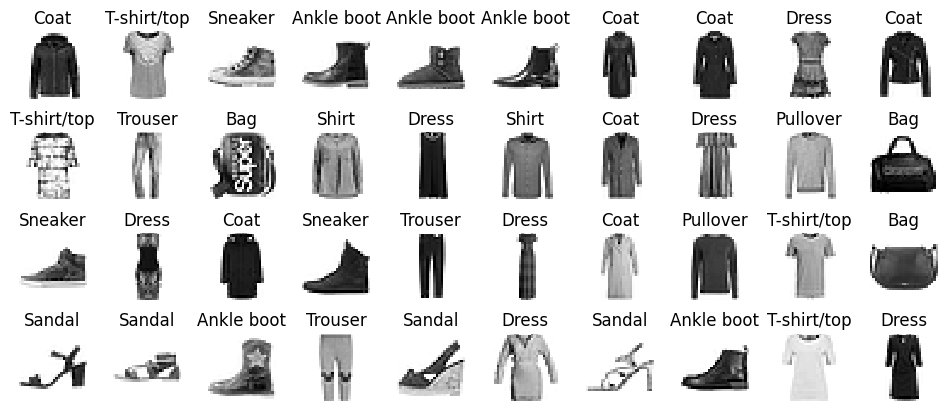

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5);

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Softmax activation is used for multi class classification.It converts a vector of K real numbers into a probability distribution of K possible outcomes.$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [ ]:
300*784+300
#300*784 full connections+300 biases


235500

In [ ]:
300*100+100

30100

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


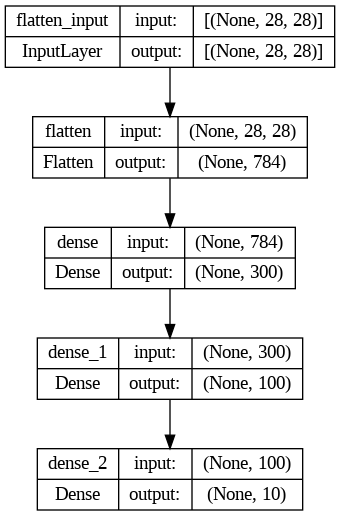

In [ ]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

Keras uses some default initializers.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

Categorical cross entropy is very similar to logistic loss. $$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \cdot \log(\hat{y}_{ij})
$$

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7162 - accuracy: 0.7664 - val_loss: 0.5198 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4906 - accuracy: 0.8269 - val_loss: 0.4436 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4452 - accuracy: 0.8426 - val_loss: 0.5414 - val_accuracy: 0.7952
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4188 - accuracy: 0.8542 - val_loss: 0.4018 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4001 - accuracy: 0.8594 - val_loss: 0.3851 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8657 - val_loss: 0.3760 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3684 - accuracy: 0.8697 - val_loss: 0.3753 - val_accuracy:

The primary purpose of validation data is to monitor the model's performance on data that it hasn't seen during training. This helps you evaluate how well the model generalizes to new, unseen examples.

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

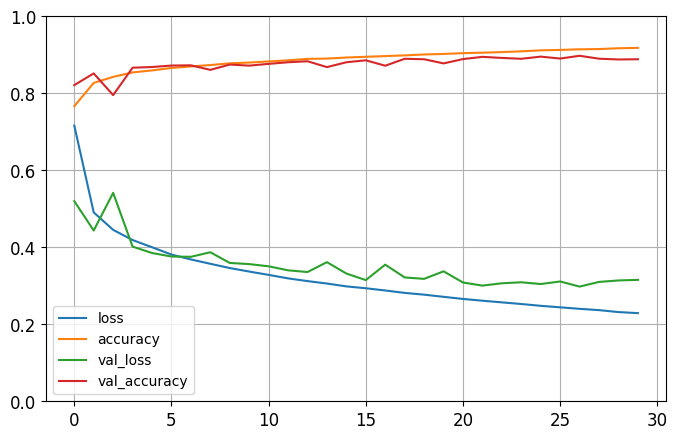

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.0263 - accuracy: 0.1000


[3.026293992996216, 0.10000000149011612]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 295ms/step


array([[0.11, 0.01, 0.05, 0.1 , 0.01, 0.47, 0.1 , 0.13, 0.01, 0.01],
       [0.11, 0.01, 0.05, 0.1 , 0.01, 0.45, 0.11, 0.13, 0.01, 0.01],
       [0.12, 0.02, 0.05, 0.11, 0.01, 0.44, 0.1 , 0.13, 0.01, 0.01]],
      dtype=float32)

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([5, 5, 5])

In [ ]:
np.array(class_names)[y_pred]

array(['Sandal', 'Sandal', 'Sandal'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

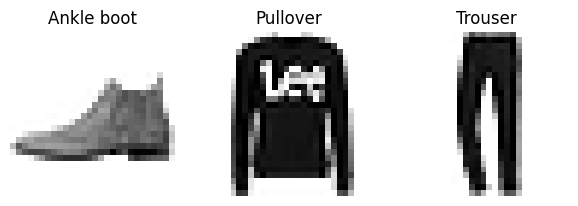

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5);

###Improving the Neural Network
At first almost always the neural network wont give great result. Few of the following methods can improve performance of your NN.


*   Try with different types of activation functions
*   Normalize your data. If you are normalizing with mean and standard deviation make sure you normalize your test data with mean and standard deviations estimated from train data.
*   Work with different optimization functions.
*   Use different architecture (number of layers, number of neurones,regularization)
*   Early stopping, learning rate scheduling.
  









### Regression MLP

Let's load, split and scale the California housing dataset

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=50)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fit_transform is called on training data only, validation and test data uses same parameters as the training data
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [ ]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ])

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1:]

(8,)

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


In [9]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))



Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7929 - val_loss: 13.1111
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4850 - val_loss: 5.2484
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4546 - val_loss: 0.4266
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4163 - val_loss: 0.4066
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3912 - val_loss: 0.3993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3838 - val_loss: 0.3973
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3757 - val_loss: 0.3960
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3740 - val_loss: 0.4046
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3749 - val_loss: 0.3954
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3649 - val_loss: 0.396

In [12]:
model.layers[0].get_weights()

[array([[ 7.60145411e-02, -2.06116676e-01,  4.85763818e-01,
          3.67868394e-01, -1.52107775e-01,  3.44226003e-01,
          7.89981782e-02,  3.51426899e-01, -4.03834283e-01,
          2.02899382e-01, -4.85739022e-01, -9.23726484e-02,
         -1.40648171e-01,  2.74518669e-01, -2.99232483e-01,
         -2.40334406e-01, -9.96230394e-02,  2.28110656e-01,
         -2.38650054e-01,  4.63885188e-01,  3.81931402e-02,
          3.32736783e-02,  3.73881400e-01,  2.80270338e-01,
          7.62946159e-02,  2.99143910e-01,  4.59588282e-02,
          2.27993447e-02, -1.58835605e-01, -3.05224627e-01],
        [-2.16478229e-01, -5.50358593e-02,  1.61905274e-01,
         -3.40264171e-01, -3.40513319e-01,  2.41127715e-01,
          2.81682819e-01,  9.08705369e-02, -6.63669482e-02,
          1.47412449e-01,  1.31889373e-01,  8.29183683e-02,
          3.02519232e-01, -1.41193613e-01, -6.60134628e-02,
         -8.18693936e-02,  1.81338862e-01,  5.40956184e-02,
          2.38851726e-01,  2.26842403e-

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 158ms/step


array([[0.477907 ],
       [1.533294 ],
       [4.3073735]], dtype=float32)

162/162 [==============================] - 0s 3ms/step


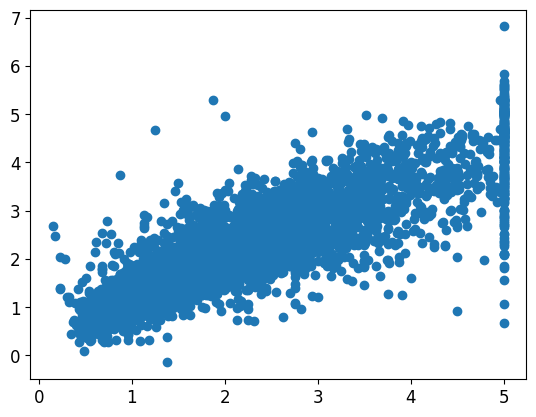

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [ ]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 1s 4ms/step - loss: 0.3341


0.3341117799282074

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


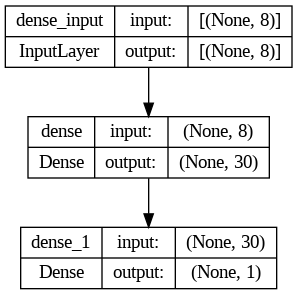

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.layers[1].get_weights()

[array([[ 0.10803426],
        [-0.09747876],
        [-0.7671485 ],
        [-0.18579806],
        [ 0.06979952],
        [-0.01335062],
        [-0.20273179],
        [ 0.9760487 ],
        [-0.40599132],
        [-0.12478145],
        [-0.4794722 ],
        [ 0.1651796 ],
        [ 0.27919063],
        [-0.33807245],
        [-0.17990378],
        [ 0.0189781 ],
        [-0.0951677 ],
        [-0.02551286],
        [-0.23917922],
        [ 0.8017125 ],
        [ 0.99476975],
        [-0.02594058],
        [ 0.8005735 ],
        [-0.35182658],
        [ 0.01096963],
        [ 0.10874906],
        [ 0.05363045],
        [ 0.40714127],
        [ 0.10824762],
        [-0.14804071]], dtype=float32),
 array([1.1130093], dtype=float32)]

NameError: name 'dense' is not defined

In [ ]:
mse_test

0.3532491624355316

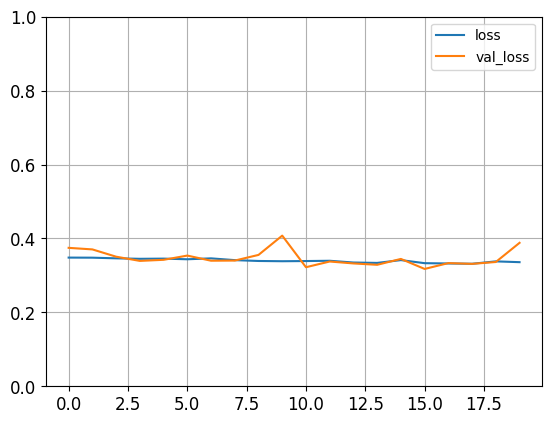

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred

array([[0.7405552],
       [1.675873 ],
       [4.190014 ]], dtype=float32)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1)
])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                270       
                                                                 
 dense_13 (Dense)            (None, 15)                465       
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 751 (2.93 KB)
Trainable params: 751 (2.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


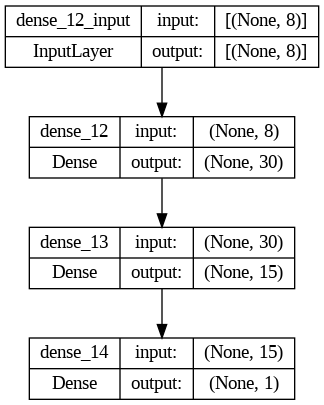

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model2.fit(X_train, y_train, epochs=19, validation_data=(X_valid, y_valid))


Epoch 1/19
363/363 [==============================] - 5s 5ms/step - loss: 0.8367 - val_loss: 0.4769
Epoch 2/19
363/363 [==============================] - 1s 3ms/step - loss: 0.4631 - val_loss: 0.4068
Epoch 3/19
363/363 [==============================] - 1s 2ms/step - loss: 0.4162 - val_loss: 0.3932
Epoch 4/19
363/363 [==============================] - 1s 2ms/step - loss: 0.3902 - val_loss: 0.3806
Epoch 5/19
363/363 [==============================] - 1s 2ms/step - loss: 0.3771 - val_loss: 0.3810
Epoch 6/19
363/363 [==============================] - 1s 2ms/step - loss: 0.3657 - val_loss: 0.3780
Epoch 7/19
363/363 [==============================] - 1s 2ms/step - loss: 0.3622 - val_loss: 0.3446
Epoch 8/19
363/363 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.3415
Epoch 9/19
363/363 [==============================] - 1s 3ms/step - loss: 0.3516 - val_loss: 0.3395
Epoch 10/19
363/363 [==============================] - 1s 2ms/step - loss: 0.3481 - val_loss: 0.3466

In [ ]:
mse_test = model2.evaluate(X_test, y_test)
mse_test


162/162 [==============================] - 0s 2ms/step - loss: 0.3285


0.32845351099967957

162/162 [==============================] - 1s 4ms/step


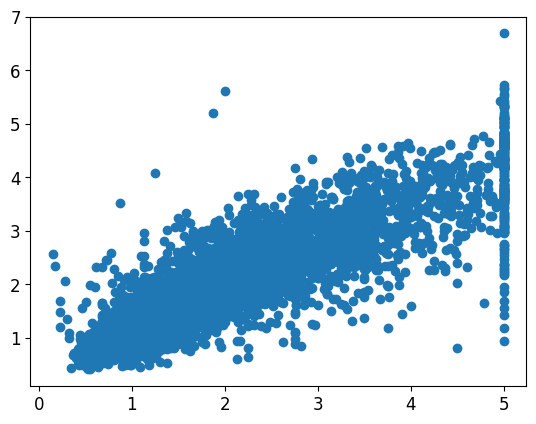

In [ ]:
y_pred = model2.predict(X_test)
plt.scatter(y_test,y_pred)

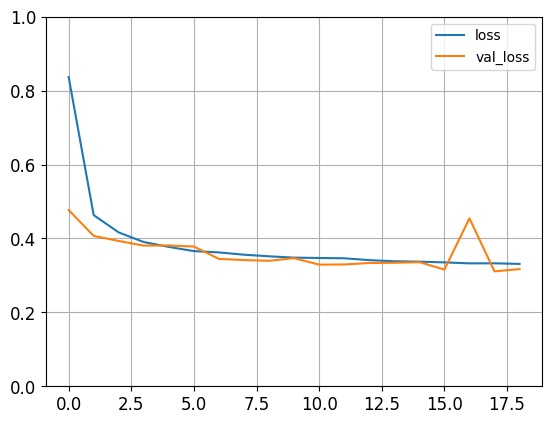

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model3 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model3.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history3 = model3.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))


y_pred = model3.predict(X_new)

162/162 [==============================] - 0s 2ms/step


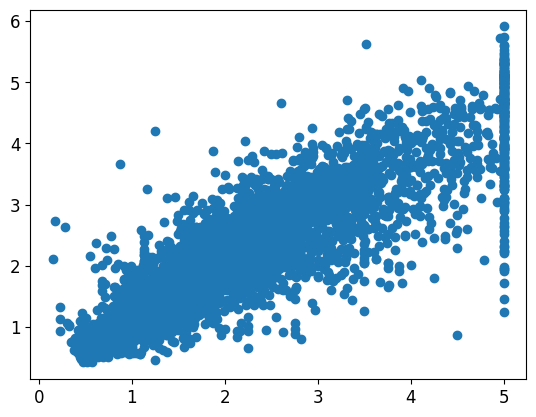

In [ ]:
y_pred = model3.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
model3.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2859


0.28585970401763916

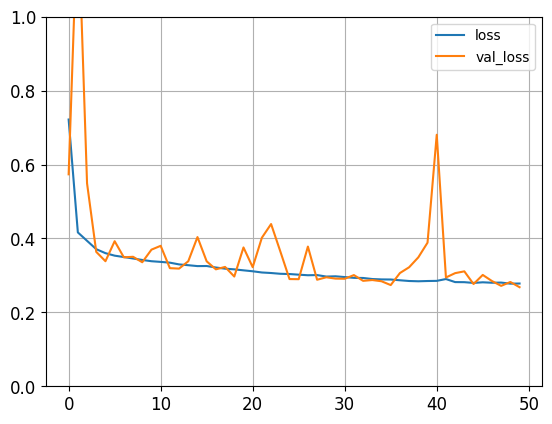

In [ ]:
plt.plot(pd.DataFrame(history3.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model4 = keras.models.Sequential([
    keras.layers.Dense(15, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1)
])
model4.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history4 = model4.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))


Epoch 1/50
363/363 [==============================] - 6s 9ms/step - loss: 0.6940 - val_loss: 0.4439
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4247 - val_loss: 0.4301
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4059 - val_loss: 0.4871
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.4048
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3827 - val_loss: 0.4025
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3738 - val_loss: 0.5097
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3746 - val_loss: 0.3800
Epoch 8/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3646 - val_loss: 0.3801
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3593 - val_loss: 0.3682
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3555 - val_loss: 0.4939

In [ ]:
mse_test = model4.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

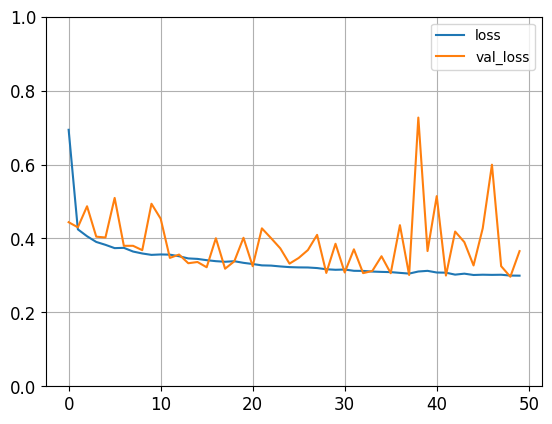

In [ ]:
plt.plot(pd.DataFrame(history4.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

If there is small gap between training loss and validation loss but both of them are high that means model is highly biased.<br>  If training loss is much lower than validation loss that is a clear sign of overfitting.

### Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(10, activation="relu")(input_)
hidden2 = keras.layers.Dense(5, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(10, activation="relu")(input_)
concat = keras.layers.concatenate([input_, hidden1])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

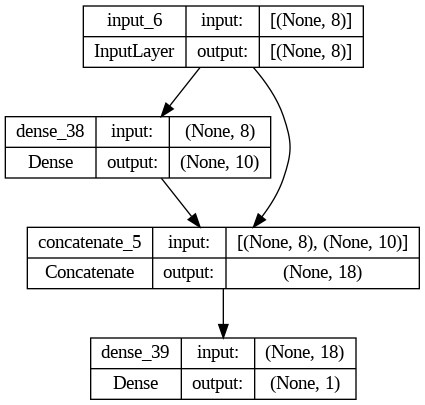

In [ ]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_38 (Dense)            (None, 10)                   90        ['input_6[0][0]']             
                                                                                                  
 concatenate_5 (Concatenate  (None, 18)                   0         ['input_6[0][0]',             
 )                                                                   'dense_38[0][0]']            
                                                                                                  
 dense_39 (Dense)            (None, 1)                    19        ['concatenate_5[0][0]'] 

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=6,
                    validation_data=(X_valid, y_valid))


Epoch 1/6
363/363 [==============================] - 1s 3ms/step - loss: 1.0293 - val_loss: 26.5740
Epoch 2/6
363/363 [==============================] - 1s 3ms/step - loss: 0.5296 - val_loss: 4.0054
Epoch 3/6
363/363 [==============================] - 1s 2ms/step - loss: 0.5142 - val_loss: 1.2787
Epoch 4/6
363/363 [==============================] - 1s 3ms/step - loss: 0.5742 - val_loss: 0.4975
Epoch 5/6
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.5201
Epoch 6/6
363/363 [==============================] - 1s 2ms/step - loss: 0.4170 - val_loss: 1.5725


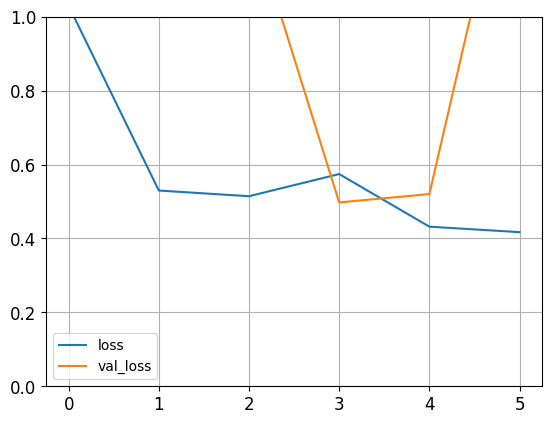

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
X_test

array([[-1.15780104, -0.28673138, -0.49550877, ...,  0.38899735,
         0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973, ..., -0.11818174,
        -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788, ..., -0.67694905,
         1.00890193, -1.4271529 ],
       ...,
       [-0.90351581,  0.66256679, -0.8562583 , ...,  0.68837768,
        -0.76194926,  0.66187253],
       [ 1.56873373, -1.78978682,  0.75535703, ..., -0.18226735,
         1.34152212, -0.73747465],
       [ 1.43527981,  0.58345861,  0.10928062, ..., -0.17819366,
        -0.82285155,  0.59190517]])

In [ ]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4) through wide path, and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

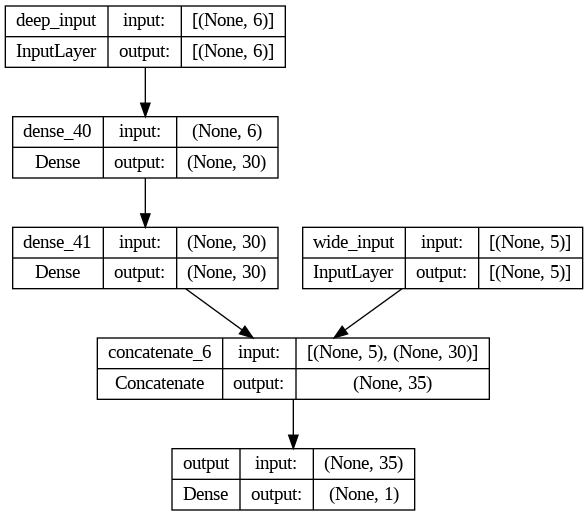

In [ ]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.0114 - val_loss: 9.3337
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5261 - val_loss: 0.6604
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4570 - val_loss: 0.4679
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6660 - val_loss: 0.4468
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4182 - val_loss: 0.4134
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4004 - val_loss: 0.3999
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 0.3969
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3796 - val_loss: 0.4012
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3722 - val_loss: 0.4739
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3650 - val_loss: 0.3740

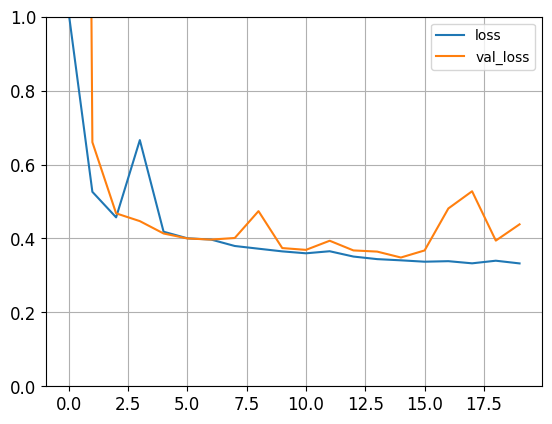

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can use different regularization techniques in neural networks.


*   Dropout : The idea behind dropout is to randomly "drop out" (i.e., set to zero) a fraction of input units during training.During each training iteration, dropout randomly selects a subset of neurons to be "dropped out" with a specified probability.
*   $L_1,L_2$ regularization
*   Batch normalization : Batch Norm is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.
*   Early stopping









### Saving and Restoring

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 888us/step - loss: 0.4382


In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.predict(X_new)

1/1 [==============================] - 0s 32ms/step


array([[0.5400235],
       [1.6505971],
       [3.009824 ]], dtype=float32)

In [ ]:
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

### Using Callbacks during Training

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_lo